In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

# search all files inside a specific folder
# *.* means file name with any extension
dir_path = r'Data/Consumers/processed/*'
res = glob.glob(dir_path)

In [3]:
dict_df={}
sel_col=['States_UTs','Total']
for files in res:
    yr=files[-8:-4]
    
    dict_df[yr]=pd.read_csv(files,usecols=sel_col)
    print(files[-8:-4])

2014
2015
2016
2017
2020
2021


In [4]:
dict_df['2016']['States_UTs'][0]

'Andaman and Nicobar Islands'

In [31]:
temp={}
for key, value_df in dict_df.items():
    temp[key]=value_df.shape[0]
key_max = max(temp, key=temp.get)

del temp[key_max]
temp_df=pd.DataFrame()
temp_df['States/UTs']=dict_df[key_max]['States_UTs']
temp_df[key_max]=dict_df[key_max]['Total']

for key,value in temp.items():
    temp_df=pd.merge(temp_df,dict_df[key],left_on='States/UTs',right_on='States_UTs',how='left')
    temp_df=temp_df.drop('States_UTs',axis=1)
    temp_df=temp_df.rename(columns={'Total':key})

temp_df['2018']=np.NaN
temp_df['2019']=np.NaN

order=['States/UTs','2014','2015','2016','2017','2018','2019','2020','2021']
temp_df=temp_df[order]
yearly_Cons_df=temp_df.set_index('States/UTs')
yearly_Cons_df=yearly_Cons_df.T
yearly_Cons_df['Total']=yearly_Cons_df.sum(axis=1)

In [39]:
yearly_Cons_df['Total'][4]=np.NaN
yearly_Cons_df['Total'][5]=np.NaN
yearly_Cons_df['Total'].interpolate(method='linear',inplace=True)

In [138]:
temp_df

,States/UTs,2014,2015,2016,2017,2018,2019,2020,2021
0,Andaman and Nicobar Islands,117046.0,119743.0,119743.0,123027.0,NaN,NaN,142243.0,141738.0
1,Andhra Pradesh,22784817.0,16230466.0,16992222.0,17295399.0,NaN,NaN,19130319.0,19315258.0
2,Arunachal Pradesh,215271.0,215271.0,215271.0,213749.0,NaN,NaN,275100.0,234398.0
3,Assam,2921452.0,3301591.0,3592243.0,4029328.0,NaN,NaN,5901579.0,5901579.0
4,Bihar,4132442.0,4132442.0,4132442.0,10295411.0,NaN,NaN,15877310.0,16973233.0
5,Chandigarh,NaN,NaN,216896.0,NaN,NaN,NaN,234629.0,254413.0
6,Chhattisgarh,4041595.0,4294606.0,4517450.0,4743151.0,NaN,NaN,5759002.0,5906689.0
7,Dadra and Nagar Haveli,60602.0,65182.0,66658.0,70300.0,NaN,NaN,82963.0,82963.0
8,Daman and Diu,56135.0,57704.0,59138.0,60180.0,NaN,NaN,62510.0,63404.0
9,Delhi,4856035.0,5057849.0,5336540.0,NaN,NaN,NaN,6241987.0,6412472.0


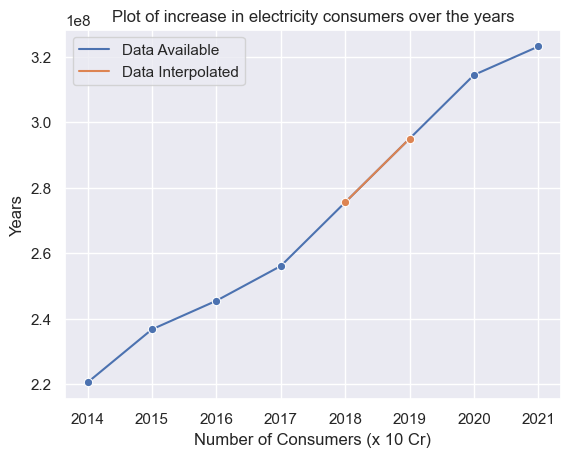

In [57]:
sns.set(style="darkgrid")
markers_color = ['green','green','green','green','red','red','green','green'] 
sns.lineplot(data=yearly_Cons_df,x=yearly_Cons_df.index,y='Total',marker='o',hue=markers_color)
sns.set_palette(['green', 'red'])
legend=plt.legend()
legend.get_texts()[0].set_text('Data Available')  # Change label text for Line 1
legend.get_texts()[1].set_text('Data Interpolated')
plt.xlabel("Number of Consumers (x 10 Cr)")
plt.ylabel("Years")
plt.title("Plot of increase in electricity consumers over the years")
plt.show()


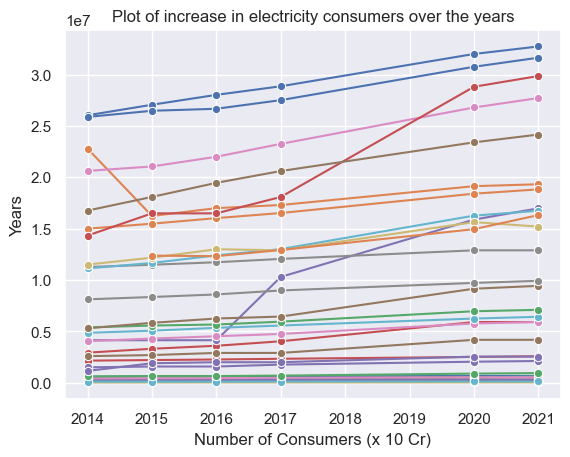

In [68]:
sns.set(style="darkgrid")
#markers_color = ['green','green','green','green','red','red','green','green']

for cols in yearly_Cons_df.columns[:-1]:
    sns.lineplot(data=yearly_Cons_df,x=yearly_Cons_df.index,y=cols,marker='o')
sns.set_palette(['green', 'red'])
# legend=plt.legend()
# legend.get_texts()[0].set_text('Data Available')  # Change label text for Line 1
# legend.get_texts()[1].set_text('Data Interpolated')
plt.xlabel("Number of Consumers (x 10 Cr)")
plt.ylabel("Years")
plt.title("Plot of increase in electricity consumers over the years")
plt.show()


In [80]:
(yearly_Cons_df.columns)

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Total'],
      dtype='object', name='States/UTs')

In [94]:
North_reg=['Chandigarh','Delhi','Haryana','Himachal Pradesh','Jammu and Kashmir',
           'Punjab','Rajasthan','Uttar Pradesh','Uttarakhand']
West_reg=['Chhattisgarh','Gujarat','Madhya Pradesh','Maharashtra',
          'Daman and Diu','Dadra and Nagar Haveli','Goa']
South_reg=['Andhra Pradesh','Telangana','Karnataka','Kerala','Tamil Nadu','Puducherry','Lakshadweep']
East_reg=['Bihar','Jharkhand','Odisha','West Bengal','Sikkim','Andaman and Nicobar Islands']
North_East_reg=['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Tripura']

In [121]:
yearly_reg=pd.DataFrame()
yearly_reg['Northern Region']=yearly_Cons_df[North_reg].sum(axis=1)
yearly_reg['Southern Region']=yearly_Cons_df[South_reg].sum(axis=1)
yearly_reg['Eastern Region']=yearly_Cons_df[East_reg].sum(axis=1)
yearly_reg['North Eastern Region']=yearly_Cons_df[North_East_reg].sum(axis=1)
yearly_reg['Western Region']=yearly_Cons_df[West_reg].sum(axis=1)
yearly_reg['Total']=yearly_reg.sum(axis=1,skipna=True)
yearly_reg.iloc[4]=np.NaN
yearly_reg.iloc[5]=np.NaN

In [122]:
yearly_reg

,Northern Region,Southern Region,Eastern Region,North Eastern Region,Western Region,Total
2014,48943825.0,80969913.0,28969441.0,4715829.0,56878492.0,220477500.0
2015,53277916.0,88049723.0,30941268.0,5221443.0,59206628.0,236696978.0
2016,55096866.0,90154444.0,32939821.0,5579953.0,61666489.0,245437573.0
2017,51952829.0,93512264.0,40459745.0,6281046.0,63844764.0,256050648.0
2018,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN
2020,74662520.0,105050766.0,52849135.0,8639848.0,73220935.0,314423204.0
2021,75945897.0,108420898.0,54988054.0,8761121.0,75000071.0,323116041.0


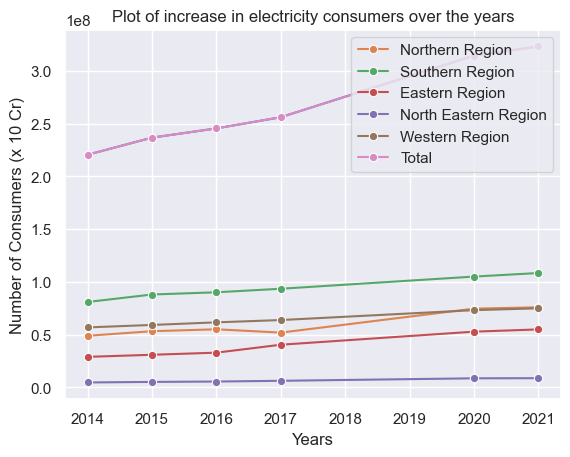

In [134]:
sns.set(style="darkgrid")
markers_color = ['green','green','green','green','red','red','green','green'] 
sns.lineplot(data=yearly_reg,x=yearly_reg.index,y='Total',marker='o')

for col in yearly_reg.columns:
    sns.lineplot(data=yearly_reg,x=yearly_reg.index,y=col,marker='o',label=col)

legend = plt.legend()
for lh in legend.legend_handles:
    lh.set_alpha(0)
plt.legend(loc='upper right') 

sns.set_palette(['green', 'red'])
plt.xlabel("Years")
plt.ylabel("Number of Consumers (x 10 Cr)")
plt.title("Plot of increase in electricity consumers over the years")
plt.show()

In [137]:
yearly_Cons_df.to_csv('Data/Consumers/processed/one/consumer_State.csv')
yearly_reg.to_csv('Data/Consumers/processed/one/consumer_Region.csv')